# Pytorch

In [4]:
import pygame
import random

Starting_blue_blobs = 10
Starting_red_blobs = 3

WIDTH = 800
HEIGHT = 600
WHITE = (255,255,255)
BLUE = (0,0,255)
RED = (255,0,0)

game_display = pygame.display.set_mode((WIDTH , HEIGHT))
pygame.display.set_caption("FIRST GAME")
clock = pygame.time.Clock()


class Blob:
    def __init__(self, color):
        self.x = random.randrange(0 , WIDTH)
        self.y = random.randrange(0 , HEIGHT)
        self.size = random.randrange(4,8)
        self.color = color
    def move(self):
        self.move_x = random.randrange(-1,2)
        self.move_y = random.randrange(-1,2)
        self.x += self.move_x
        self.y += self.move_y
        
        if self.x < 0 : self.x = 0
        elif self.x > WIDTH : self.x = WIDTH
        
        if self.y < 0 : self.y = 0
        elif self.y > HEIGHT :  self.y = HEIGHT


def draw_environment(blob_list):
    game_display.fill(WHITE)
    
    for blob_dict in blob_list:
        for blob_id in blob_dict:
            blob = blob_dict[blob_id]
            pygame.draw.circle(game_display , blob.color , [blob.x , blob.y] , blob.size)
            blob.move()
    pygame.display.update()
    
    
def main():
    blue_blobs = dict(enumerate([Blob(BLUE) for i in range(Starting_blue_blobs)]))
    red_blobs = dict(enumerate([Blob(RED) for i in range(Starting_red_blobs)]))
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT :
                pygame.quit()
                quit()
        draw_environment([blue_blobs,red_blobs])
        clock.tick(60)
        
        
if __name__ == '__main__':
    main()
        

pygame 2.0.1 (SDL 2.0.14, Python 3.8.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


error: display Surface quit

In [2]:
import torch

x = torch.tensor([3,5])
y = torch.tensor([2,2])

print(x*y)

tensor([ 6, 10])


In [3]:
x = torch.zeros([3,5])
x

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [4]:
y = torch.rand([2,3])
y

tensor([[0.1654, 0.8922, 0.3168],
        [0.1930, 0.3742, 0.9919]])

In [5]:
y.view([1,6])

tensor([[0.1654, 0.8922, 0.3168, 0.1930, 0.3742, 0.9919]])

In [1]:
import torch
import torchvision
from torchvision import transforms , datasets


In [2]:
train = datasets.MNIST('' , train = True , download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('' , train = False , download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train , batch_size = 10 , shuffle = True)
testset  = torch.utils.data.DataLoader(test , batch_size = 10 , shuffle = True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
x,y  = data[0][0] , data[1][0]
print(y)

tensor(1)


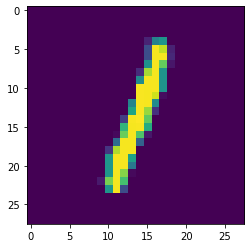

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x.view(28,28))
plt.show()

In [9]:
total = 0 
counter_dict = {0:0 , 1:0 , 2:0 , 3:0 ,4:0 , 5:0 , 6:0 , 7:0 , 8:0  , 9:0}

for data in trainset:
    Xs , ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)        

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [10]:
for i in counter_dict:
    print(f"{i} : {counter_dict[i]/total*100}")

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28 , 32)
        self.fc2 = nn.Linear(32 , 32)
        self.fc3 = nn.Linear(32 , 32)
        self.fc4 = nn.Linear(32 , 10)
        
    def forward(self , x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x , dim = 1)
        

        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [18]:
X = torch.rand((28,28))
X = X.view(-1 , 28*28)

In [19]:
output = net(X)

In [20]:
output

tensor([[-2.3625, -2.1733, -2.1567, -2.3238, -2.3351, -2.2978, -2.4240, -2.2415,
         -2.4924, -2.2676]], grad_fn=<LogSoftmaxBackward>)

In [9]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters() , lr= 0.001)

Epochs = 3

for epoch in range(Epochs):
    for data in trainset:
        X , y  = data
        net.zero_grad()
        output = net(X.view(-1 , 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.2580, grad_fn=<NllLossBackward>)
tensor(0.0058, grad_fn=<NllLossBackward>)
tensor(0.0960, grad_fn=<NllLossBackward>)


In [10]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X , y = data
        output= net(X.view(-1,784))
        for idx , i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("accuracy: " , round(correct/total , 3))            

accuracy:  0.972
